In [4]:
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [7]:
import numpy as np
import matplotlib.pyplot as plt

Iteration: 320


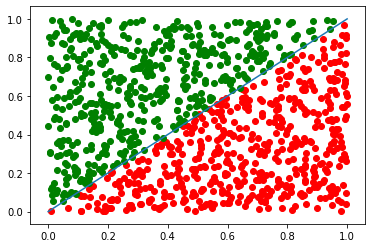

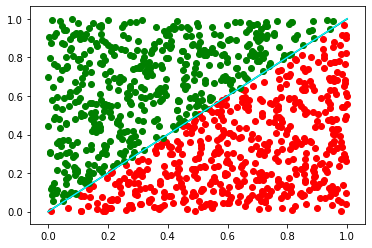

In [59]:
# (a)
# y = x
np.random.seed(100)
n = 1000


X1 = np.random.rand(n)
X2 = np.random.rand(n)
X = np.stack((np.ones(n), X1, X2), axis=-1)

x_line = np.linspace(0, 1, 100)
y_line = x_line
mask = X1 > X2

Y = np.zeros(n)
Y[mask] = 1
Y[~mask] = -1

plt.figure(1)
plt.scatter(X1[mask], X2[mask], color='red')
plt.scatter(X1[~mask], X2[~mask], color='green')
plt.plot(x_line, y_line)

# PLA algoritm

w = np.zeros(3)
counter = 0
while True:
    y_pred = (np.dot(X, w) > 0).astype(float) * 2 - 1
    misclassified_index = np.nonzero( Y != y_pred)[0]
    if len(misclassified_index) == 0:
        break
    cur_index = np.random.choice(misclassified_index)
    w = w + Y[cur_index] * X[cur_index]

    counter += 1

print(f"Iteration: {counter}")

# PLot all

# x1 = np.linspace(0, 1, 100)
g_line = (-w[1] * x_line - w[0] ) / w[2]

plt.figure(2)
plt.scatter(X1[mask], X2[mask], color='red')
plt.scatter(X1[~mask], X2[~mask], color='green')
plt.plot(x_line, y_line, color='k')
plt.plot(x_line, g_line, color='cyan')
